In [1]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchmetrics
from tqdm.auto import tqdm

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# **Getting Dataset**
* we will use FashionMNIST data


In [3]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(), # to transofrm the data
    target_transform = None # how do we want to tranform the labels or targets
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

100%|██████████| 26421880/26421880 [00:02<00:00, 12822501.99it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 204109.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3711486.20it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19007286.08it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(test_data)

10000

In [5]:
len(train_data)

60000

In [6]:
# see train data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
# to see class names --> there are 9 classes in the data
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### The above output [1, 28, 28] --> [color_channel, height, width]

* Greyscale images has 1 color channel

# **1.2 Visualise a image**

image shape: torch.Size([1, 28, 28])
shape of squeezed image: torch.Size([28, 28])


Text(0.5, 1.0, '9')

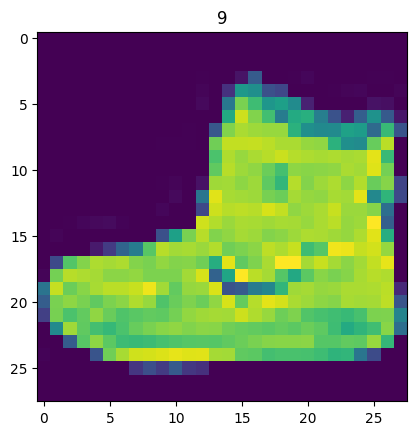

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
print(f"shape of squeezed image: {image.squeeze().shape}")
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

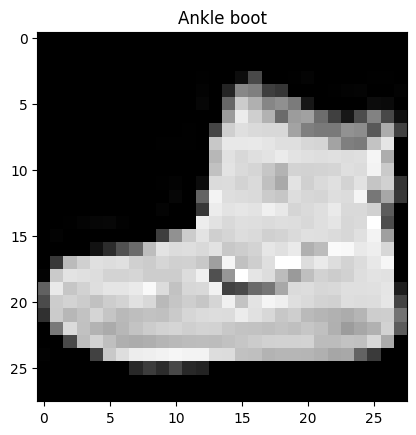

In [11]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])

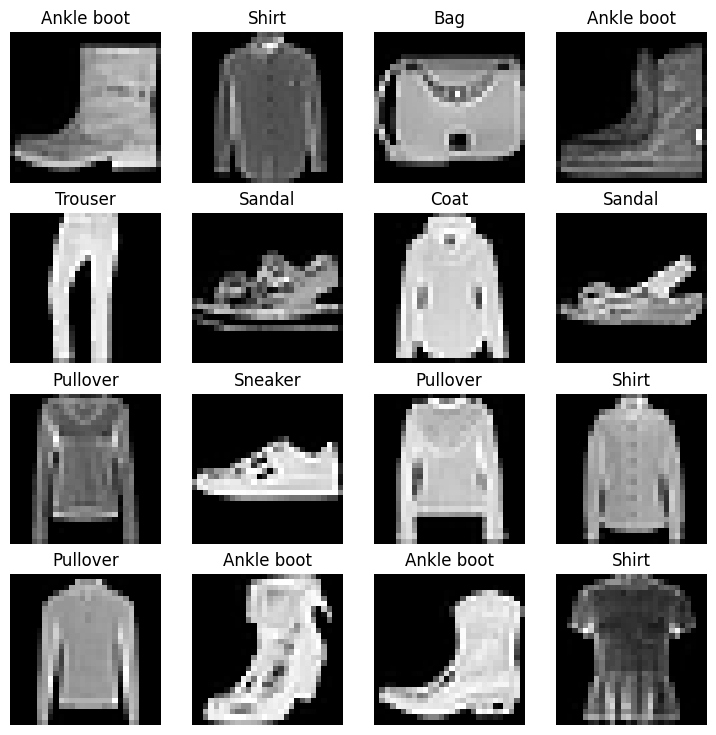

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [13]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

# 2. Prepare DataLoader


In [15]:
from torch.utils.data import DataLoader

# steup batch size
BATCH_SIZE = 32

# Turn the datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

In [16]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c036d28dc30>,
 <torch.utils.data.dataloader.DataLoader at 0x7c036d29c3a0>)

In [17]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c036d28dc30>, <torch.utils.data.dataloader.DataLoader object at 0x7c036d29c3a0>)
Length of train dataloader : 1875 batches of 32
Length of test dataloader : 313 batches of 32


In [18]:
# check out what's inside dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [19]:
train_features_batch

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


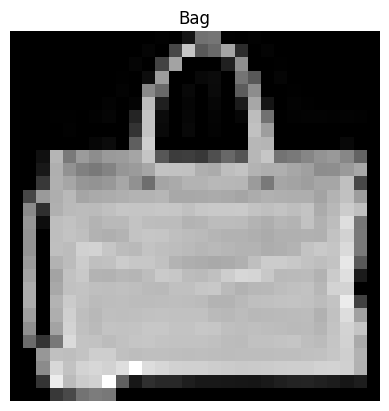

In [20]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [21]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **Building a Convolution Neural Network**

In [22]:
 # create a cnn
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size=3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding =1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,
                      out_features = output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1:{x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2:{x.shape}")
        x = self.classifier(x)
        # print(f"output shape of classifier: {x.shape}")
        return x


In [23]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV2(
    input_shape = 1, # our input size will be 1 because we are using only 1 channel
    hidden_units = 10,
    output_shape = len(class_names)).to(device)

## **setup a loss function and optimizer**

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [25]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## **Creating a function for training and testing loop**

In [26]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [27]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## **Training and testing loop**

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_1 = timer()
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------")
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)

train_time_end_model_1 = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_model_1,
                                           end = train_time_end_model_1,
                                           device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------------------


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Train loss: 0.59421 | Train accuracy: 78.30%
Test loss: 0.39950 | Test accuracy: 85.59%

Epoch: 1
------------------
Train loss: 0.35977 | Train accuracy: 87.11%
Test loss: 0.34718 | Test accuracy: 87.05%

Epoch: 2
------------------
Train loss: 0.32148 | Train accuracy: 88.39%
Test loss: 0.32280 | Test accuracy: 88.42%

Epoch: 3
------------------
Train loss: 0.30283 | Train accuracy: 89.01%
Test loss: 0.32821 | Test accuracy: 88.09%

Epoch: 4
------------------
Train loss: 0.28833 | Train accuracy: 89.60%
Test loss: 0.30423 | Test accuracy: 89.33%

Epoch: 5
------------------
Train loss: 0.27679 | Train accuracy: 89.88%
Test loss: 0.32293 | Test accuracy: 88.29%

Epoch: 6
------------------
Train loss: 0.27011 | Train accuracy: 90.19%
Test loss: 0.29495 | Test accuracy: 89.22%

Epoch: 7
------------------
Train loss: 0.26408 | Train accuracy: 90.43%
Test loss: 0.30214 | Test accuracy: 89.60%

Epoch: 8
------------------
Train loss: 0.25848 | Train accuracy: 90.56%
Test loss: 0.29419 

In [29]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [30]:
# get model_1 results

model_1_results = eval_model(
    model = model_1,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_1_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3176461160182953,
 'model_acc': 88.82787539936102}

## **Make and evaluate random perdiction from model**

In [31]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):

    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim = 0).to(device)

            # Forward pass (model outputs are raw logits)
            pred_logit = model(sample)

            # get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())


# Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [32]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [76]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

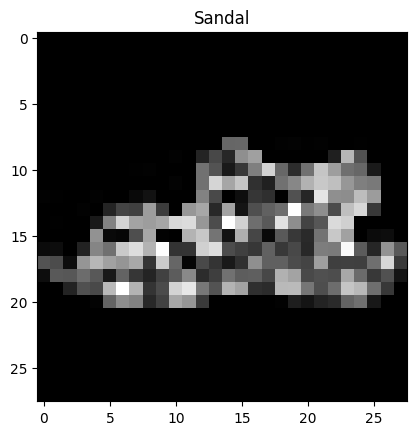

In [77]:
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [78]:
# Make predictions
pred_probs = make_predictions(model = model_1,
                              data = test_samples)

# view first two prediction probabilities
pred_probs[:2]

tensor([[2.2458e-08, 1.3255e-08, 7.1422e-08, 1.1919e-08, 1.0850e-06, 9.9996e-01,
         1.0325e-07, 6.4112e-06, 1.1835e-05, 2.0331e-05],
        [1.0185e-04, 1.2378e-07, 1.4932e-02, 2.8714e-06, 7.0937e-03, 3.4559e-09,
         9.7787e-01, 2.3436e-08, 7.2067e-07, 1.2588e-07]])

In [79]:
# convert predictio probs to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 6, 6, 4, 3, 1, 2, 3, 4])

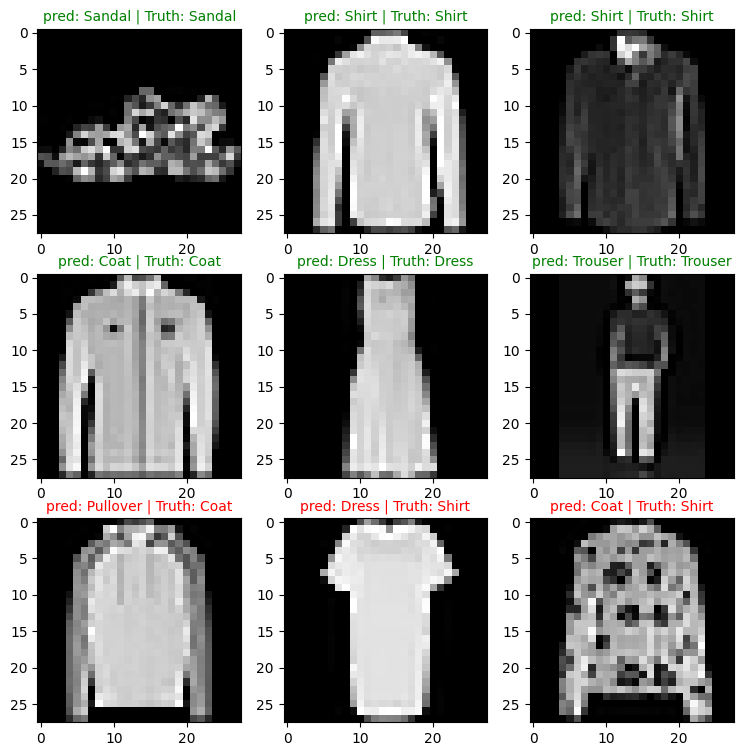

In [80]:
# plot predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    #create subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap = "gray")

    # Find the prediction in text form
    pred_label = class_names[pred_classes[i]]

    # get the truth label
    truth_label = class_names[test_labels[i]]

    #create a title for the plot
    title_text = f"pred: {pred_label} | Truth: {truth_label}"

    # check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize =10, c = "g")
    else:
        plt.title(title_text, fontsize = 10, c = "r")


## **Let's make a confusion matrix 😁👻**

1. Make prediction with our trained model
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [88]:
# 1. Make predictions with trained model
y_preds = []
model_1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions..."):

        # send data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do forward pass
        y_logit = model_1(X)

        # Turn predictions form logits --> prediction probabilities --> prediction labels
        y_pred = torch.softmax(y_logit, dim = 1).argmax(dim=1)

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Conctenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor



Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [89]:
len(y_pred_tensor)

10000

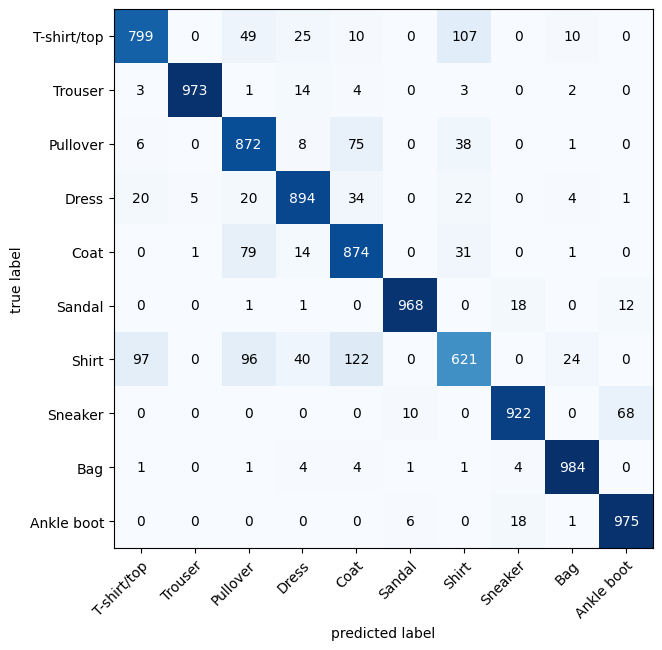

In [93]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Steup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = "multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)
)


# **Save and Load our model**

In [97]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save
MODEL_NAME = "CNN_best_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), # we have saved state dict of our model
           f = MODEL_SAVE_PATH)

Saving model to: models/CNN_best_model.pth


In [96]:
model_1.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3976,  0.4075, -0.5956],
                        [ 0.3272,  0.4222, -0.1968],
                        [-0.3940,  0.1448,  0.2702]]],
              
              
                      [[[-0.8525,  0.7561, -0.2342],
                        [ 0.0698,  0.5865,  0.1228],
                        [-0.3223,  0.2002,  0.3322]]],
              
              
                      [[[-0.2446, -0.0647,  0.0896],
                        [-1.2997, -1.0651,  0.5660],
                        [-1.3571, -1.2132, -0.0683]]],
              
              
                      [[[-1.0822, -1.7474, -0.7731],
                        [ 0.3075, -0.9989,  0.4083],
                        [ 0.3297, -0.0682,  0.4715]]],
              
              
                      [[[-0.0483,  0.2182, -0.1527],
                        [-0.3152,  0.0511, -0.3074],
                        [-0.0534,  0.2650,  0.0459]]],
              
              
      

In [101]:
# Create a new instance to load the model
torch.manual_seed(42)

loaded_model_1 = FashionMNISTModelV2(
    input_shape = 1,
    hidden_units = 10,
    output_shape = len(class_names))


# Load in the saved state_dict()
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# send the model to the target dvcie
loaded_model_1.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [102]:
model_1_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3176461160182953,
 'model_acc': 88.82787539936102}

In [103]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_1_results = eval_model(
    model = loaded_model_1,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_1_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3176461160182953,
 'model_acc': 88.82787539936102}

In [104]:
# check if model results are close enough
torch.isclose(torch.tensor(model_1_results["model_loss"]),
              torch.tensor(loaded_model_1_results["model_loss"]),
              atol = 1e-02) # we can set tolerence level`

tensor(True)

## Stepping through **nn.Conv2d**

In [24]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [25]:
test_image.shape

torch.Size([3, 64, 64])

In [27]:
 torch.manual_seed(42)
# we are going to create single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3,3),
                       stride = 1,
                       padding = 0)

# pass the data through conv layers
conv_output = conv_layer(test_image.unsqueeze(dim = 0))
conv_output.shape

torch.Size([1, 10, 62, 62])

## **Stepping through `nn.MaxPool2d()`**

In [29]:
# Print out original image shape without unsqueezed dimension
print(f"test image original shape: {test_image.shape}")
print(f"test image with unsqueezed dimesion: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer to see what's going on
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv_layer first
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f"shape after going through conv_layer: {test_image_through_conv.shape}")

# Pass the data through max pool layer
test_image_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after passing through max_pool layer: {test_image_max_pool.shape}")

test image original shape: torch.Size([3, 64, 64])
test image with unsqueezed dimesion: torch.Size([1, 3, 64, 64])
shape after going through conv_layer: torch.Size([1, 10, 62, 62])
shape after passing through max_pool layer: torch.Size([1, 10, 31, 31])


### **let's see how max pool layer works**

In [32]:
# let's create another tensor
torch.manual_seed(42)
random_tensor = torch.randn(size = (1, 1, 2, 2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"random tensor shape: {random_tensor.shape}")

#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor:\n {max_pool_tensor}")
print(f"max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor:
 tensor([[[[0.3367]]]])
max pool tensor shape: torch.Size([1, 1, 1, 1])
